In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

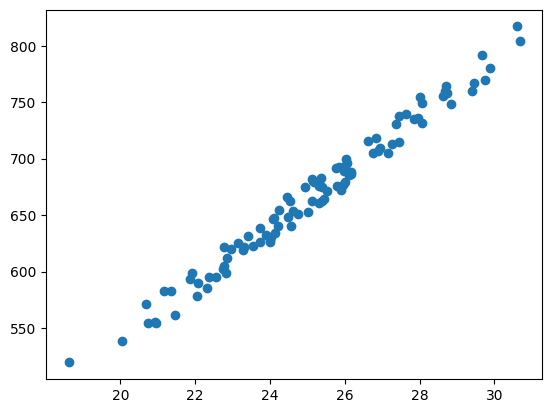

In [3]:
#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [4]:
data = (data - data.min()) / (data.max() - data.min())  #Normalize

In [5]:
model = K.Sequential([
                      #normalizer,
                      Dense(1, input_shape = [1,], activation=None)
])
model.summary()

2023-12-30 12:18:46.707324: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 12:18:46.707387: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 12:18:48.040306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 12:18:48.040343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 12:18:48.040365: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [8]:



model.fit(x=data['area'].values,y=data['price'].values, 
          epochs=100, 
          batch_size=32, 
          verbose=1, 
          validation_split=0.2)

Epoch 1/100


2023-12-30 12:25:30.885287: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-30 12:25:31.687089: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f283ebc04d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-30 12:25:31.687161: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-12-30 12:25:31.687168: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3060, Compute Capability 8.6


1/3 [=========>....................] - ETA: 23s - loss: 0.0189

2023-12-30 12:25:32.926096: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1703957133.074795   11858 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 [==============================] - 12s 64ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0166 - val_loss: 0.0163
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 11/100
3/3 [============

In [9]:
y_pred = model.predict(data['area'])

4/4 [==============================] - 0s 3ms/step


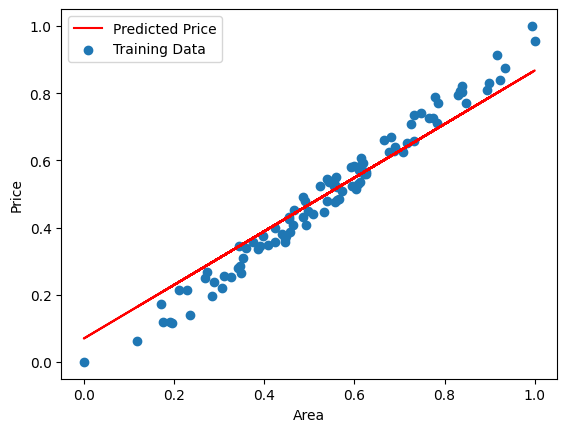

In [10]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [11]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.7976859]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.06964868], dtype=float32)>]

In [12]:
y_pred

array([[0.783691  ],
       [0.55810165],
       [0.6537994 ],
       [0.8625609 ],
       [0.800811  ],
       [0.33027273],
       [0.6490607 ],
       [0.4668807 ],
       [0.47484282],
       [0.55982864],
       [0.5157402 ],
       [0.73245335],
       [0.6177916 ],
       [0.51204044],
       [0.5653306 ],
       [0.5471053 ],
       [0.7390373 ],
       [0.45798194],
       [0.54369694],
       [0.35064718],
       [0.06964868],
       [0.60002434],
       [0.6348938 ],
       [0.3691606 ],
       [0.8673346 ],
       [0.25136203],
       [0.4994838 ],
       [0.46095493],
       [0.7454382 ],
       [0.73494846],
       [0.51754373],
       [0.5544637 ],
       [0.3450748 ],
       [0.16428994],
       [0.43437037],
       [0.51777554],
       [0.69540644],
       [0.69078994],
       [0.42785114],
       [0.4419142 ],
       [0.31848377],
       [0.25704318],
       [0.2096968 ],
       [0.8145752 ],
       [0.4076184 ],
       [0.41945747],
       [0.2847019 ],
       [0.620